# Репозиторий проекта:
https://github.com/ndmitrak/Git_Lesson

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Откроем-и-подготовим-данные" data-toc-modified-id="Откроем-и-подготовим-данные-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Откроем и подготовим данные</a></span><ul class="toc-item"><li><span><a href="#Откроем-таблицу" data-toc-modified-id="Откроем-таблицу-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Откроем таблицу</a></span></li><li><span><a href="#Изучим-таблицу" data-toc-modified-id="Изучим-таблицу-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Изучим таблицу</a></span></li><li><span><a href="#Исправим-таблицу" data-toc-modified-id="Исправим-таблицу-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Исправим таблицу</a></span></li><li><span><a href="#Изучим-параметры" data-toc-modified-id="Изучим-параметры-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Изучим параметры</a></span></li><li><span><a href="#Разобьем-датафрейм-на-обучающую,-тестовую-и-валидационную-выборки" data-toc-modified-id="Разобьем-датафрейм-на-обучающую,-тестовую-и-валидационную-выборки-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Разобьем датафрейм на обучающую, тестовую и валидационную выборки</a></span></li><li><span><a href="#Преобразуем-категориальные-признаки-в-численные-при-помощи-техники-прямого-кодирования-и-масштабируем-данные" data-toc-modified-id="Преобразуем-категориальные-признаки-в-численные-при-помощи-техники-прямого-кодирования-и-масштабируем-данные-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Преобразуем категориальные признаки в численные при помощи техники прямого кодирования и масштабируем данные</a></span></li></ul></li><li><span><a href="#Исследуем-баланс-классов" data-toc-modified-id="Исследуем-баланс-классов-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследуем баланс классов</a></span></li><li><span><a href="#Учтем-дисбаланс-классов-и-найдем-лучшую-модель" data-toc-modified-id="Учтем-дисбаланс-классов-и-найдем-лучшую-модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Учтем дисбаланс классов и найдем лучшую модель</a></span><ul class="toc-item"><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Взвешивание классов</a></span></li><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Увеличение выборки</a></span></li><li><span><a href="#Уменьшение-выборки" data-toc-modified-id="Уменьшение-выборки-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Уменьшение выборки</a></span></li></ul></li><li><span><a href="#Финальное-тестирование-лучшей-модели" data-toc-modified-id="Финальное-тестирование-лучшей-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Финальное тестирование лучшей модели</a></span></li></ul></div>

# Отток клиентов

Модель строится для компании "Бета-Банк". 

**Цель** — спрогнозировать, уйдет ли клиент из банка в ближайшее время.<br>

**Использованные данные** — данные оповедении клиентов и расторжении договоров с банком.<br>

**Задача**<br>
Построение модели с предельно большим значением F1-меры.<br> 
Метрика должна составлять не менее 0.59.<br>
Проверка F1-меры на тестовой выборке.<br>
Измерение AUC-ROC и сравнение ее значения с F1-мерой.<br>


**Признаки**<br>
<i>RowNumber</i> — индекс строки в данных<br>
<i>CustomerId</i> — уникальный идентификатор клиента<br>
<i>Surname</i> — фамилия<br>
<i>CreditScore</i> — кредитный рейтинг<br>
<i>Geography</i> — страна проживания<br>
<i>Gender</i> — пол<br>
<i>Age</i> — возраст<br>
<i>Tenure</i> — сколько лет человек является клиентом банка<br>
<i>Balance</i> — баланс на счёте<br>
<i>NumOfProducts</i> — количество продуктов банка, используемых клиентом<br>
<i>HasCrCard</i> — наличие кредитной карты<br>
<i>IsActiveMember</i> — активность клиента<br>
<i>EstimatedSalary</i> — предполагаемая зарплата<br>

**Целевой признак**<br>
<i>Exited</i> — факт ухода клиента<br>

## Откроем и подготовим данные ##



In [1]:
!pip install scikit-learn==1.1.3
!pip install imblearn

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder  
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import (
    mean_squared_error,
    roc_auc_score,
    classification_report,
    confusion_matrix,
    roc_curve, 
    roc_auc_score, 
    f1_score,
    make_scorer,
    recall_score
)
from sklearn.utils import shuffle
from sklearn.dummy import DummyClassifier

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

import seaborn as sns
import matplotlib.pyplot as plt
import re
import numpy as np



In [2]:
def get_data_info(data): # создадим функцию для получения информации о данных
    display(data.sample(5))
    display(data.info())
    display(data.describe(include='all'))
    display(data.nunique())

### Откроем таблицу

In [3]:
try: #откроем таблицу
    df = pd.read_csv('/Users/nata/Downloads/Churn.csv')
except: 
    df = pd.read_csv('https://code.s3.yandex.net/datasets/Churn.csv')

### Изучим таблицу

In [4]:
display(df.head(10)) # посмотрим первые десять строк таблицы

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [5]:
df.info() # посмотрим общую информацию о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


В столбце Tenure (сколько лет человек является клиентом банка) не хватает части данных. Посмотрим на строки, где эти данные отсутствуют. 

In [6]:
df[df['Tenure'].isnull() == True].sample(10) # выведем пример строк, где отсутствуют данные о Tenure

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5935,5936,15778089,Stevenson,544,Spain,Male,37,NaN,0.00,2,0,0,135067.02,0
6414,6415,15642912,Tu,618,France,Female,21,NaN,125682.79,1,0,0,57762.00,0
237,238,15764866,Synnot,539,Germany,Female,43,NaN,116220.50,3,1,0,55803.96,1
8633,8634,15801414,Bitter,767,France,Female,35,NaN,0.00,2,0,0,144251.38,0
7458,7459,15800049,Grigoryeva,728,Spain,Female,43,NaN,0.00,1,1,1,120088.17,0
8245,8246,15569626,Miller,577,Spain,Male,35,NaN,110080.30,1,1,1,109794.31,0
4445,4446,15736413,Hall,739,France,Male,29,NaN,0.00,2,1,1,164484.78,0
5845,5846,15654300,Mao,530,Germany,Male,33,NaN,75242.28,1,0,1,101694.67,0
6902,6903,15636548,Lung,457,Spain,Male,44,NaN,0.00,2,0,0,185992.36,0
7209,7210,15788131,Atkins,653,France,Male,47,NaN,0.00,1,1,0,50695.93,1


In [7]:
df.Tenure.isnull().sum() # посчитаем количество строк, где Tenure = NaN

909

In [8]:
df.Tenure.value_counts()

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: Tenure, dtype: int64

In [9]:
description = df.describe(include='all')
transposed_description = description.T
display(transposed_description)# проверим данные в таблице

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,NaN,NaN,NaN,5000.5,2886.89568,1.0,2500.75,5000.5,7500.25,10000.0
CustomerId,10000.0,NaN,NaN,NaN,15690940.5694,71936.186123,15565701.0,15628528.25,15690738.0,15753233.75,15815690.0
Surname,10000,2932,Smith,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CreditScore,10000.0,NaN,NaN,NaN,650.5288,96.653299,350.0,584.0,652.0,718.0,850.0
Geography,10000,3,France,5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,10000,2,Male,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,10000.0,NaN,NaN,NaN,38.9218,10.487806,18.0,32.0,37.0,44.0,92.0
Tenure,9091.0,NaN,NaN,NaN,4.99769,2.894723,0.0,2.0,5.0,7.0,10.0
Balance,10000.0,NaN,NaN,NaN,76485.889288,62397.405202,0.0,0.0,97198.54,127644.24,250898.09
NumOfProducts,10000.0,NaN,NaN,NaN,1.5302,0.581654,1.0,1.0,1.0,2.0,4.0


In [10]:
df.duplicated().sum() # проверим наличие дубликатов

0

**Вывод:** Таблица содержит 14 столбцов. Недостающие данные наблюдаются в столбце Tenure. Дубликатов не найдено. Типы данных корректны везде, кроме столбца tenure. В нем логичнее применить целочисленный формат. Формат наименования столбцов необходимо исправить.<br>
В таблице имеется ряд столбцов, характеризующих категориальные признаки: geography, gender, has_or_card, is_active_member, exited

### Исправим таблицу

Изменим стиль наименования столбцов на snake_case_string

In [11]:
df.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_', i).lower() for i in df.columns]

In [12]:
df.head(5) # проверим полученный результат

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Избавимся от лишних столбцов с номером клиента, его фамилией и ID, так как эти параметры не влияют на уход клиента из банка. 

In [13]:
df = df.drop(['row_number', 'surname', 'customer_id'], axis=1) # избавимся от лишнb[] столбца с номером клиента
display(df)

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


### Изучим параметры 


Природа пропусков значений в Tenure неизвестна. 
Удалять этот столбец было бы некорректно, так как он может иметь значение для обучения модели. 
Если заполнить столбец медианным значением, есть риск исказить общую картину. Заполним его методом интерполяции, чтобы сохранить пропорции имеющихся данных, и исправим тип данных в этом столбце. 

In [14]:
df.value_counts('tenure') # посмотрим, как распределяются значения в tenure

tenure
1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
dtype: int64

In [15]:
df['tenure'] = df['tenure'].interpolate(method='linear') # заполним недостающие значения методом интерполяции

In [16]:
df['tenure'] = df['tenure'].astype('int')

In [17]:
df.value_counts('tenure')

tenure
5     1102
3     1041
4     1033
2     1031
6     1028
7     1025
1     1001
8      989
9      909
10     448
0      393
dtype: int64

In [18]:
 df.value_counts('geography') # посмотрим, из каких стран есть клиенты

geography
France     5014
Germany    2509
Spain      2477
dtype: int64

In [19]:
df.value_counts('gender') # посмотрим распределение клиентов по полам

gender
Male      5457
Female    4543
dtype: int64

In [20]:
df['age'].unique() # посмотрим, какого возраста клиенты 

array([42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 25, 35, 45, 58, 32, 38,
       46, 36, 33, 40, 51, 61, 49, 37, 19, 66, 56, 26, 21, 55, 75, 22, 30,
       28, 65, 48, 52, 57, 73, 47, 54, 72, 20, 67, 79, 62, 53, 80, 59, 68,
       23, 60, 70, 63, 64, 18, 82, 69, 74, 71, 76, 77, 88, 85, 84, 78, 81,
       92, 83])

In [21]:
df.value_counts('num_of_products') # проверим распределение по количеству продуктов, которыми пользуются клиенты

num_of_products
1    5084
2    4590
3     266
4      60
dtype: int64

In [22]:
df.value_counts('has_cr_card') # посмотрим данные по наличию или отсутствию кредитной карты

has_cr_card
1    7055
0    2945
dtype: int64

In [23]:
df.value_counts('is_active_member') # проверим данные по активности клиентов

is_active_member
1    5151
0    4849
dtype: int64

In [24]:
df.value_counts('exited')

exited
0    7963
1    2037
dtype: int64

### Разобьем датафрейм на обучающую, тестовую и валидационную выборки


In [25]:
target = df['exited'] # выберем целевой признак

In [26]:
features = df.drop('exited', axis=1) #  создадим датафрейм с прочими признаками

In [27]:
features_train, features_test_valid, target_train, target_test_valid = train_test_split(features, target, test_size=0.4, random_state=12345) # разбиваем датасет на обучающую, валидационную и тестовую выборки
features_test, features_valid, target_test, target_valid = train_test_split(features_test_valid, target_test_valid, test_size= 0.5, random_state=12345)

In [28]:
get_data_info(features_train)

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary
8875,702,Germany,Male,36,9,90560.48,2,1,0,174268.87
2118,460,France,Female,27,7,0.00,2,1,0,156150.08
3463,600,Germany,Male,43,8,133379.41,1,1,0,177378.66
773,767,France,Male,36,3,139180.20,1,0,0,123880.19
7586,828,Spain,Male,42,10,0.00,1,1,1,186071.14


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 7479 to 4578
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      6000 non-null   int64  
 1   geography         6000 non-null   object 
 2   gender            6000 non-null   object 
 3   age               6000 non-null   int64  
 4   tenure            6000 non-null   int64  
 5   balance           6000 non-null   float64
 6   num_of_products   6000 non-null   int64  
 7   has_cr_card       6000 non-null   int64  
 8   is_active_member  6000 non-null   int64  
 9   estimated_salary  6000 non-null   float64
dtypes: float64(2), int64(6), object(2)
memory usage: 515.6+ KB


None

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary
count,6000.000000,6000,6000,6000.000000,6000.00000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
unique,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,3015,3291,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,652.389167,NaN,NaN,38.932333,5.00550,76596.571457,1.517833,0.707833,0.526833,99497.136868
std,96.302474,NaN,NaN,10.537912,2.82509,62119.098224,0.580866,0.454796,0.499321,57744.589774
min,350.000000,NaN,NaN,18.000000,0.00000,0.000000,1.000000,0.000000,0.000000,11.580000
25%,586.000000,NaN,NaN,32.000000,3.00000,0.000000,1.000000,0.000000,0.000000,49594.147500
50%,654.500000,NaN,NaN,37.000000,5.00000,96860.935000,1.000000,1.000000,1.000000,100140.570000
75%,717.000000,NaN,NaN,44.000000,7.00000,127651.035000,2.000000,1.000000,1.000000,148495.122500


credit_score         448
geography              3
gender                 2
age                   69
tenure                11
balance             3851
num_of_products        4
has_cr_card            2
is_active_member       2
estimated_salary    6000
dtype: int64

In [29]:
get_data_info(features_test)

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary
3337,579,Spain,Male,56,4,99340.83,1,0,0,4523.74
5906,788,France,Male,32,4,112079.58,1,0,0,89368.59
9135,727,Spain,Female,49,7,96296.78,1,1,0,190457.87
5317,700,France,Male,37,1,135179.49,1,1,0,160670.37
4677,706,Germany,Female,48,10,104478.12,3,0,1,158248.71


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 8532 to 6895
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      2000 non-null   int64  
 1   geography         2000 non-null   object 
 2   gender            2000 non-null   object 
 3   age               2000 non-null   int64  
 4   tenure            2000 non-null   int64  
 5   balance           2000 non-null   float64
 6   num_of_products   2000 non-null   int64  
 7   has_cr_card       2000 non-null   int64  
 8   is_active_member  2000 non-null   int64  
 9   estimated_salary  2000 non-null   float64
dtypes: float64(2), int64(6), object(2)
memory usage: 171.9+ KB


None

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary
count,2000.000000,2000,2000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
unique,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1008,1060,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,647.101500,NaN,NaN,38.921000,4.811000,77400.355115,1.548000,0.704500,0.497500,101128.477925
std,96.494024,NaN,NaN,10.706871,2.835895,62687.979741,0.585549,0.456381,0.500119,57923.780181
min,365.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,90.070000
25%,579.000000,NaN,NaN,32.000000,2.000000,0.000000,1.000000,0.000000,0.000000,51054.977500
50%,649.000000,NaN,NaN,37.000000,5.000000,98851.265000,2.000000,1.000000,0.000000,99914.685000
75%,716.000000,NaN,NaN,44.000000,7.000000,128114.520000,2.000000,1.000000,1.000000,152398.270000


credit_score         405
geography              3
gender                 2
age                   64
tenure                11
balance             1286
num_of_products        4
has_cr_card            2
is_active_member       2
estimated_salary    2000
dtype: int64

In [30]:
get_data_info(features_valid)

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary
8730,764,France,Male,30,5,0.00,2,0,1,105155.66
4521,560,Spain,Female,27,7,124995.98,1,1,1,114669.79
4686,536,Spain,Male,53,2,143923.96,1,1,0,2019.78
8117,624,Spain,Female,34,6,0.00,1,1,0,582.59
1349,575,Spain,Male,43,3,0.00,1,1,0,83594.51


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 7041 to 3366
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      2000 non-null   int64  
 1   geography         2000 non-null   object 
 2   gender            2000 non-null   object 
 3   age               2000 non-null   int64  
 4   tenure            2000 non-null   int64  
 5   balance           2000 non-null   float64
 6   num_of_products   2000 non-null   int64  
 7   has_cr_card       2000 non-null   int64  
 8   is_active_member  2000 non-null   int64  
 9   estimated_salary  2000 non-null   float64
dtypes: float64(2), int64(6), object(2)
memory usage: 171.9+ KB


None

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary
count,2000.000000,2000,2000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000
unique,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,991,1106,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,648.375000,NaN,NaN,38.891000,5.044500,75239.376955,1.549500,0.69950,0.497500,100831.310875
std,97.766751,NaN,NaN,10.114261,2.834349,62948.812792,0.579411,0.45859,0.500119,56386.212880
min,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,142.810000
25%,579.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,55072.777500
50%,648.000000,NaN,NaN,37.000000,5.000000,96367.740000,2.000000,1.00000,0.000000,100583.050000
75%,719.000000,NaN,NaN,44.000000,7.000000,127206.852500,2.000000,1.00000,1.000000,148902.897500


credit_score         413
geography              3
gender                 2
age                   61
tenure                11
balance             1249
num_of_products        4
has_cr_card            2
is_active_member       2
estimated_salary    2000
dtype: int64

Количество уникальных значений в выборках различается, но полностью отсутствующих в какой-либо выборке не наблюдается. 

### Преобразуем категориальные признаки в численные при помощи техники прямого кодирования и масштабируем данные

In [31]:
ohe_features = features_train.select_dtypes(include='object').columns.to_list()
print(ohe_features)



['geography', 'gender']


In [32]:
num_features = features_train.select_dtypes(exclude='object').columns.to_list()
num_features

['credit_score',
 'age',
 'tenure',
 'balance',
 'num_of_products',
 'has_cr_card',
 'is_active_member',
 'estimated_salary']

In [33]:

encoder_ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)
encoder_ohe.fit(features_train[ohe_features])

features_train[
    encoder_ohe.get_feature_names_out()
] = encoder_ohe.transform(features_train[ohe_features])

scaler = StandardScaler()

features_train[num_features] = scaler.fit_transform(features_train[num_features])

features_train = features_train.drop(['geography', 'gender'], axis=1)

features_train.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
7479,-0.886751,-0.373192,1.060055,1.232271,-0.891560,0.642466,-1.055187,-0.187705,0.0,1.0,1.0
3411,0.608663,-0.183385,1.060055,0.600563,-0.891560,-1.556504,-1.055187,-0.333945,0.0,0.0,0.0
6027,2.052152,0.480939,-0.709948,1.027098,0.830152,-1.556504,0.947699,1.503095,1.0,0.0,1.0
1247,-1.457915,-1.417129,0.352054,-1.233163,0.830152,0.642466,-1.055187,-1.071061,0.0,0.0,1.0
3716,0.130961,-1.132419,-1.063949,1.140475,-0.891560,-1.556504,-1.055187,1.524268,1.0,0.0,0.0


In [34]:
features_test[  # кодируем и масштабируем тестовую выборку
    encoder_ohe.get_feature_names_out()
] = encoder_ohe.transform(features_test[ohe_features])

features_test = features_test.drop(ohe_features, axis=1)

features_test[num_features] = scaler.transform(
    features_test[num_features]
)

features_test.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
8532,-0.699824,-0.373192,-1.063949,-1.233163,0.830152,0.642466,-1.055187,-0.015173,0.0,0.0,0.0
5799,-0.284431,0.575842,-0.709948,-1.233163,-0.891560,0.642466,0.947699,1.471724,0.0,0.0,0.0
5511,0.151731,-0.657902,-1.771950,0.438711,-0.891560,0.642466,-1.055187,-1.367107,1.0,0.0,1.0
7365,-0.876366,-0.278288,1.768056,1.239884,-0.891560,0.642466,0.947699,-0.786517,0.0,1.0,0.0
7367,-0.481743,0.291132,1.768056,-1.233163,0.830152,0.642466,-1.055187,1.358533,0.0,1.0,1.0


In [35]:
features_valid[  # кодируем и масштабируем валидационную выборку
    encoder_ohe.get_feature_names_out()
] = encoder_ohe.transform(features_valid[ohe_features])

features_valid = features_valid.drop(ohe_features, axis=1)

features_valid[num_features] = scaler.transform(
    features_valid[num_features]
)

features_valid.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
7041,-2.226392,-0.088482,-1.063949,-1.233163,0.830152,0.642466,-1.055187,0.647083,0.0,0.0,1.0
5709,-0.087120,0.006422,1.414055,-1.233163,-0.891560,0.642466,-1.055187,-1.658410,0.0,0.0,0.0
7117,-0.917905,-0.752805,-0.001947,0.722307,-0.891560,0.642466,0.947699,-1.369334,0.0,1.0,1.0
7775,-0.253277,0.101325,1.768056,-1.233163,0.830152,0.642466,-1.055187,0.075086,0.0,1.0,1.0
8735,0.785204,-0.847708,1.768056,0.615625,-0.891560,-1.556504,0.947699,-1.070919,0.0,0.0,1.0


## Исследуем баланс классов ##



In [36]:
target_train.value_counts() # проверим, сколько у нас объектов положительного и отрицательного класса


0    4804
1    1196
Name: exited, dtype: int64

Наблюдается значительный дисбаланс. 

***Вывод:*** Мы разбили датафрейм на тренировочную, тестовую и валидационную выборки. Затем преобразовали категориальные признаки в численные, масштабировали признаки и исследовали дисбаланс.<br> Расхождение между количеством объектов положительного и отрицательного класса — более чем в четыре раза. Это значительный дисбаланс. 

Обучим модели без учета дисбаланса 

In [37]:
dec_tree_model = DecisionTreeClassifier(random_state=12345)
params = {
    'max_depth': range(3, 7),
    'min_samples_split': range(2, 10),
    'min_samples_leaf': range(1, 4)
}
scorer = make_scorer(f1_score)

best_score = 0
best_params = {}

for max_depth in params['max_depth']:
    for min_samples_split in params['min_samples_split']:
        for min_samples_leaf in params['min_samples_leaf']:
            model = DecisionTreeClassifier(
                max_depth=max_depth, 
                min_samples_split=min_samples_split,
                min_samples_leaf=min_samples_leaf,
                random_state=12345
            )
            model.fit(features_train, target_train)
            predicted_valid = model.predict(features_valid)
            f1 = f1_score(target_valid, predicted_valid)
            if f1 > best_score:
                best_score = f1
                best_params = {
                    'max_depth': max_depth,
                    'min_samples_split': min_samples_split,
                    'min_samples_leaf': min_samples_leaf
                }

print('Лучшие гиперпараметры:', best_params)
print('Лучший F1 score on CV:', best_score)

model = DecisionTreeClassifier(**best_params, random_state=12345)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
f1 = f1_score(target_valid, predicted_valid)

print('ROC_auc:', roc_auc_score(target_valid, predicted_valid))

Лучшие гиперпараметры: {'max_depth': 6, 'min_samples_split': 2, 'min_samples_leaf': 2}
Лучший F1 score on CV: 0.5368098159509203
ROC_auc: 0.6897346759190551


In [38]:
log_reg_model = LogisticRegression(random_state=12345, solver='liblinear') # обучим модель логистической регрессии 
log_reg_model.fit(features_train, target_train)
log_reg_predictions = log_reg_model.predict(features_valid)

print('F1:', f1_score(target_valid, predicted_valid))
print("ROC_auc:", roc_auc_score(target_valid, log_reg_predictions))

F1: 0.5368098159509203
ROC_auc: 0.5687363114271194


In [39]:
best_model = None
best_score = 0

for est in range(10, 51, 10):
    for depth in range(1, 6):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_train, target_train)
        predicted_valid = model.predict(features_valid)
        score_f1 = f1_score(target_valid, predicted_valid, average='weighted')
        score_roc_auc = roc_auc_score(target_valid, predicted_valid)
        combined_score = (score_f1 + score_roc_auc) / 2
        print("n_estimators =", est, ", max_depth =", depth)
        print("F1 score:", score_f1)
        print("ROC-AUC score:", score_roc_auc)
        print("Combined score:", combined_score)
        if combined_score > best_score:
            best_score = combined_score
            best_model = model

print("Лучшие гиперпараметры:")
print(best_model)
print("Качество с учетом двух параметров", best_score)

predicted_test = best_model.predict(features_test)
score_f1 = f1_score(target_test, predicted_test, average='weighted')
score_roc_auc = roc_auc_score(target_test, predicted_test)
print("Лучшие показатели модели на тестовых данных:")
print("F1 score:", score_f1)
print("ROC-AUC score:", score_roc_auc)

n_estimators = 10 , max_depth = 1
F1 score: 0.6952555213866368
ROC-AUC score: 0.5
Combined score: 0.5976277606933185
n_estimators = 10 , max_depth = 2
F1 score: 0.7427864184323327
ROC-AUC score: 0.5512891431346889
Combined score: 0.6470377807835108
n_estimators = 10 , max_depth = 3
F1 score: 0.7464494731580692
ROC-AUC score: 0.5557002178178935
Combined score: 0.6510748454879813
n_estimators = 10 , max_depth = 4
F1 score: 0.8008231876378977
ROC-AUC score: 0.6337451335764859
Combined score: 0.7172841606071918
n_estimators = 10 , max_depth = 5
F1 score: 0.8090668347693534
ROC-AUC score: 0.6489391683943688
Combined score: 0.7290030015818612
n_estimators = 20 , max_depth = 1
F1 score: 0.6952555213866368
ROC-AUC score: 0.5
Combined score: 0.5976277606933185
n_estimators = 20 , max_depth = 2
F1 score: 0.7359046052873073
ROC-AUC score: 0.543101109177284
Combined score: 0.6395028572322956
n_estimators = 20 , max_depth = 3
F1 score: 0.7484280327937617
ROC-AUC score: 0.5580642840117469
Combined s

***Новый вывод:*** При обучении модели без учета дисбаланса:<br> 

Дерево решений:<br> 
<b>Лучшие гиперпараметры: {'max_depth': 6, 'min_samples_split': 2, 'min_samples_leaf': 2}<br>
Лучший F1 score on CV: 0.5368098159509203<br>
ROC_auc: 0.6897346759190551<br></b>


Логистическая регрессия:<br> 
F1: 0.5106382978723405<br>
ROC_auc: 0.5687363114271194<br>

Случайный лес:<br>
RandomForestClassifier(max_depth=5, n_estimators=10, random_state=12345)<br>
F1 score: 0.8303823032759203<br>
ROC-AUC score: 0.6793774460285872<br>


Идельным показателем считается 1, поэтому имеет смысл учесть дисбаланс классов. 

## Учтем дисбаланс классов и найдем лучшую модель ##



### Взвешивание классов ###

In [40]:
dec_tree_model = DecisionTreeClassifier(random_state=12345, class_weight='balanced') # обучим модель дерева решений c учетом взвешивания классов

params = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

scorer = make_scorer(f1_score) # определим метрику для оценки качества модели

grid = GridSearchCV(dec_tree_model, params, scoring=scorer) # создадим объект GridSearchCV для перебора параметров
grid.fit(features_train, target_train) # обучим модель на обучающей выборке
best_params = grid.best_params_ # получим наилучшие параметры и значение метрики на кросс-валидации
best_score = grid.best_score_ 

predicted_valid = grid.predict(features_valid) # применим модель к валидационной выборке

print('Лучшие параметры:', best_params) # выведем наилучшие параметры и метрики качества
print('Лучший F1 на CV:', best_score)
print("ROC_auc:", roc_auc_score(target_valid, predicted_valid))

Лучшие параметры: {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 10}
Лучший F1 на CV: 0.5603849966127412
ROC_auc: 0.7463485895804195


In [41]:
dec_tree_model = DecisionTreeClassifier(random_state=12345, class_weight='balanced') # обучим модель дерева решений c учетом взвешивания классов

params = {
    'max_depth': [5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

scorer = make_scorer(f1_score) # определим метрику для оценки качества модели

grid = GridSearchCV(dec_tree_model, params, scoring=scorer) # создадим объект GridSearchCV для перебора параметров
grid.fit(features_train, target_train) # обучим модель на обучающей выборке
best_params = grid.best_params_ # получим наилучшие параметры и значение метрики на кросс-валидации
best_score = grid.best_score_ 

print('Лучшие параметры:', best_params) # выведем наилучшие параметры и метрики качества
print('Лучший F1 на CV:', best_score)
print("ROC_auc:", roc_auc_score(target_valid, predicted_valid))

Лучшие параметры: {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 10}
Лучший F1 на CV: 0.5603849966127412
ROC_auc: 0.7463485895804195


In [42]:
log_reg_model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced') # обучим модель логистической регрессии c учетом взвешивания классов
log_reg_model.fit(features_train, target_train)
log_reg_predictions = log_reg_model.predict(features_valid)

print('F1:', f1_score(target_valid, predicted_valid))
print("ROC_auc:", roc_auc_score(target_valid, log_reg_predictions))

F1: 0.5649289099526067
ROC_auc: 0.681662821498761


In [43]:
random_forest_model = RandomForestClassifier(random_state=12345, class_weight='balanced')

params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, None]
}

scorer = make_scorer(f1_score, average='weighted')

grid = GridSearchCV(random_forest_model, params, scoring=scorer, cv=5, n_jobs=-1)

grid.fit(features_train, target_train)

best_params = grid.best_params_
best_score = grid.best_score_

print('Лучшие параметры:', best_params)
print('Лучший F1 на CV:', best_score)
print('ROC_auc:', roc_auc_score(target_valid, predicted_valid))

Лучшие параметры: {'max_depth': 10, 'n_estimators': 300}
Лучший F1 на CV: 0.8520230836904655
ROC_auc: 0.7463485895804195


***Вывод:*** При обучении модели c учетом взвешивания классов показатель F1:<br> 
        
Дерево решений:<br> 

Best parameters: {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 10}<br>
Best F1 score on CV: 0.5603849966127412<br>
ROC_auc: 0.7463485895804195<br>

Логистическая регрессия:<br> 
F1: 0.5649289099526067><br>
ROC_auc: 0.681662821498761<br> 

Случайный лес:<br>
Лучшие параметры: {'max_depth': 10, 'n_estimators': 300}<br>
Лучший F1 на CV: 0.8520230836904655<br>
ROC_auc: 0.7463485895804195<br>

### Увеличение выборки ###

In [44]:
oversample = SMOTE(random_state=12345) # увеличим выборку при помощи SMOTE
features_train_up, target_train_up = oversample.fit_resample(features_train, target_train)

In [45]:
dec_tree_model = DecisionTreeClassifier(random_state=12345) # обучим модель дерева решений c учетом увеличения выборки
params = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

scorer = make_scorer(f1_score) # определим метрику для оценки качества модели

grid = GridSearchCV(dec_tree_model, params, scoring=scorer) # создадим объект GridSearchCV для перебора параметров
grid.fit(features_train_up, target_train_up) # обучим модель на обучающей выборке
best_params = grid.best_params_
best_score = grid.best_score_ # получим наилучшие параметры и значение метрики на кросс-валидации

print('Лучшие параметры:', best_params) # выведем наилучшие параметры и метрики качества
print('Лучший F1 на CV:', best_score)
print("ROC_auc:", roc_auc_score(target_valid, predicted_valid))

Лучшие параметры: {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 10}
Лучший F1 на CV: 0.8089017824569685
ROC_auc: 0.7463485895804195


In [46]:
model = LogisticRegression(random_state=12345, solver='liblinear') # логистическая регрессия с увеличением выборки
model.fit(features_train_up, target_train_up) 
log_reg_predictions = model.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid))
print("ROC_auc:", roc_auc_score(target_valid, log_reg_predictions))

F1: 0.5649289099526067
ROC_auc: 0.6846610031016189


In [47]:
random_forest_model = RandomForestClassifier(random_state=12345)

params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, None]
}

scorer = make_scorer(f1_score, average='weighted')

grid = GridSearchCV(random_forest_model, params, scoring=scorer, cv=5, n_jobs=-1)

grid.fit(features_train_up, target_train_up)

best_params = grid.best_params_
best_score = grid.best_score_

print('Лучшие параметры:', best_params)
print('Лучший F1 на CV:', best_score)
print('ROC_auc:', roc_auc_score(target_valid, predicted_valid))

Лучшие параметры: {'max_depth': None, 'n_estimators': 300}
Лучший F1 на CV: 0.9129871849420832
ROC_auc: 0.7463485895804195


***Вывод:*** При обучении модели c учетом апсемплинга:<br> 
        
Дерево решений:<br> 

Best parameters: {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 10}<br>
Best F1 score on CV: 0.8089017824569685<br>
ROC_auc: 0.7463485895804195<br>

Логистическая регрессия:<br> 
F1: 0.5649289099526067<br>
ROC_auc: 0.6846610031016189<br>

Случайный лес:<br>
Лучшие параметры: {'max_depth': None, 'n_estimators': 300}<br>
Лучший F1 на CV: 0.9129871849420832<br>
ROC_auc: 0.7463485895804195<br>

### Уменьшение выборки ###

In [48]:
rus = RandomUnderSampler(random_state=12345)
features_train_down, target_train_down = rus.fit_resample(features_train, target_train)

In [49]:
dec_tree_model = DecisionTreeClassifier(random_state=12345) # обучим модель дерева решений c учетом уменьшения выборки
params = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [3, 6, 9]
}

scorer = make_scorer(f1_score) # определим метрику для оценки качества модели

grid = GridSearchCV(dec_tree_model, params, scoring=scorer) # создадим объект GridSearchCV для перебора параметров
grid.fit(features_train_down, target_train_down) # обучим модель на обучающей выборке
best_params = grid.best_params_
best_score = grid.best_score_ # получим наилучшие параметры и значение метрики на кросс-валидации

print('Лучшие параметры:', best_params) # выведем наилучшие параметры и метрики качества
print('Лучший F1 на CV:', best_score)
print("ROC_auc:", roc_auc_score(target_valid, predicted_valid))

Лучшие параметры: {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2}
Лучший F1 на CV: 0.7364434525459695
ROC_auc: 0.7463485895804195


In [50]:
model = LogisticRegression(random_state=12345, solver='liblinear') # логистическая регрессия с уменьшением выборки
model.fit(features_train_down, target_train_down) 
log_reg_predictions = model.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid))
print("ROC_auc:", roc_auc_score(target_valid, log_reg_predictions))

F1: 0.5649289099526067
ROC_auc: 0.6912637485365125


In [51]:
random_forest_model = RandomForestClassifier(random_state=12345) # случайный лес с уменьшением выборки
random_forest_model.fit(features_train_down, target_train_down)
random_forest_model_predicted_valid = random_forest_model.predict(features_valid)

print('F1:', f1_score(target_valid, random_forest_model_predicted_valid, average='weighted'))
print("ROC_auc:", roc_auc_score(target_valid, random_forest_model_predicted_valid))

F1: 0.7838931345639811
ROC_auc: 0.758285849632198


In [52]:
random_forest_model = RandomForestClassifier(random_state=12345)

params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, None]
}

scorer = make_scorer(f1_score, average='weighted')

grid = GridSearchCV(random_forest_model, params, scoring=scorer, cv=5, n_jobs=-1)

grid.fit(features_train_down, target_train_down)

best_params = grid.best_params_
best_score = grid.best_score_

print('Лучшие параметры:', best_params)
print('Лучший F1 на CV:', best_score)
print('ROC_auc:', roc_auc_score(target_valid, predicted_valid))

Лучшие параметры: {'max_depth': 10, 'n_estimators': 200}
Лучший F1 на CV: 0.7769280412645612
ROC_auc: 0.7463485895804195


**Общий вывод:** среди получившихся моделей лучшие показатели у модели случайного леса при увеличении выборки: F1 для случайного леса составляет 0.83, a ROC_auc: 0.72. Эти показатели превышают заданный по условию показатель F1 0.59.

***Вывод:*** При обучении модели c учетом даунсемплинга:<br> 
        
Дерево решений:<br> 
Лучшие параметры: {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2}<br>
Лучший F1 на CV: 0.7364434525459695<br>
ROC_auc: 0.7429224175537537<br>

Логистическая регрессия:<br> 
F1: 0.5512367491166078<br>
ROC_auc: 0.6912637485365125<br>

Случайный лес:<br>
Лучшие параметры: {'max_depth': 10, 'n_estimators': 200}<br>
Лучший F1 на CV: 0.7769280412645612<br>
ROC_auc: 0.7429224175537537<br>


Лучшей моделью с учетом всех методов оказалась модель "Случайный лес" с увеличением выборки.<br>
Лучшие параметры: {'max_depth': None, 'n_estimators': 300}<br>
Лучший F1 на CV: 0.9129871849420832<br> 
ROC_auc: 0.7463485895804195<br>

## Финальное тестирование лучшей модели ##



Лучшая модель: 

In [53]:
random_forest_model = RandomForestClassifier(random_state=12345, max_depth=None, n_estimators=300) # случайный лес с увеличением выборки
random_forest_model.fit(features_train_up, target_train_up)
random_forest_model_predicted_test = random_forest_model.predict(features_test)

probabilities_test = random_forest_model.predict_proba(features_test)
probabilities_one = probabilities_test[:, 1]

print('Площадь ROC-кривой:', roc_auc_score(target_test, probabilities_one))
print('F1:', f1_score(target_test, random_forest_model_predicted_test))


Площадь ROC-кривой: 0.8351543077323237
F1: 0.5943877551020408


Проверим матрицу ошибок 

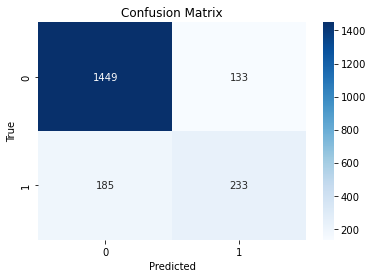

In [54]:
conf_matrix = confusion_matrix(target_test, random_forest_model_predicted_test) # создадим матрицу ошибок

sns.heatmap(conf_matrix, fmt='', annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Построим ROC-кривую 

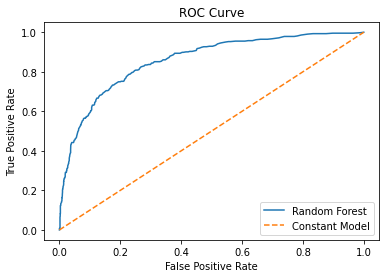

AUC score (Random Forest): 0.8568975416409947
AUC score (Constant Model): 0.5


In [55]:
constant_probs = np.full((target_valid.shape[0],), target_valid.mean()) # создадим константную модель

probs = np.concatenate([constant_probs.reshape(-1, 1), random_forest_model.predict_proba(features_valid)[:, 1].reshape(-1, 1)], axis=1) # объединим предсказания константной модели с предсказаниями нашей модели

fpr, tpr, thresholds = roc_curve(target_valid, probs[:, 1]) # построим ROC-кривую для обеих моделей
plt.plot(fpr, tpr, label='Random Forest')

fpr, tpr, thresholds = roc_curve(target_valid, probs[:, 0])
plt.plot(fpr, tpr, linestyle='--', label='Constant Model')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

auc_score = roc_auc_score(target_valid, probs[:, 1]) # посчитаем AUC для обеих моделей
print('AUC score (Random Forest):', auc_score)

auc_score = roc_auc_score(target_valid, probs[:, 0])
print('AUC score (Constant Model):', auc_score)

In [56]:
f1 = f1_score(target_test, random_forest_model_predicted_test) # еще раз отобразим f1 для теста на случайном лесе
recall = recall_score(target_test, random_forest_model_predicted_test) # посчитаем recall для теста на случайном лесе

print('F1 score случайный лес:', f1)
print('Recall случайный лес:', recall)

F1 score случайный лес: 0.5943877551020408
Recall случайный лес: 0.5574162679425837


In [57]:
dummy_model = DummyClassifier(strategy='constant', constant=1) #создадим и обучим константную модель
dummy_model.fit(features_train, target_train)
dummy_f1 = f1_score(dummy_model.predict(features_test), target_test) # получим предсказания по константной модели

print('F1 score константная модель:', dummy_f1)

F1 score константная модель: 0.3457402812241522


**Общий вывод:** 

Лучшей моделью с учетом всех методов оказалась модель "Случайный лес" с увеличением выборки.<br>
Лучшие параметры: {'max_depth': None, 'n_estimators': 300}<br>
Лучший F1 на CV: 0.9129871849420832<br>
ROC_auc: 0.7463485895804195<br>

При обучении на тестовых данных модель показала следующие результаты:<br> 
<b>Площадь ROC-кривой: 0.8351543077323237<br>
F1: 0.5943877551020408<br></b>
Это превышает заданный по условию показатель 0.59. 

Матрица ошибок показала, что модель дает:<br> 
Положительные: 1449<br>
Ложноположительные: 133<br>
Отрицательные: 233<br>
Ложноотрицательные: 185<br>
Количество верных предсказаний значительно превышает количество неверных.<br> 


ROC-кривая показала, что модель предсказывает данные гораздо точнее, чем случайная.<br> 


F1 для нашей модели значительно превышает этот показатель для  константной модели.<br> 
Это значит, что наша модель дает более точные предсказания.<br> 
<b>F1 score случайный лес: 0.5943877551020408<br></b>
F1 score константная модель: 0.3457402812241522

Показатель Recall:<br> 
Recall случайный лес: 0.5574162679425837<br> 
Это говорит о том, что  модель верно классифицировала более 50% объектов, принадлежащих к классу положительных.<br>
 

